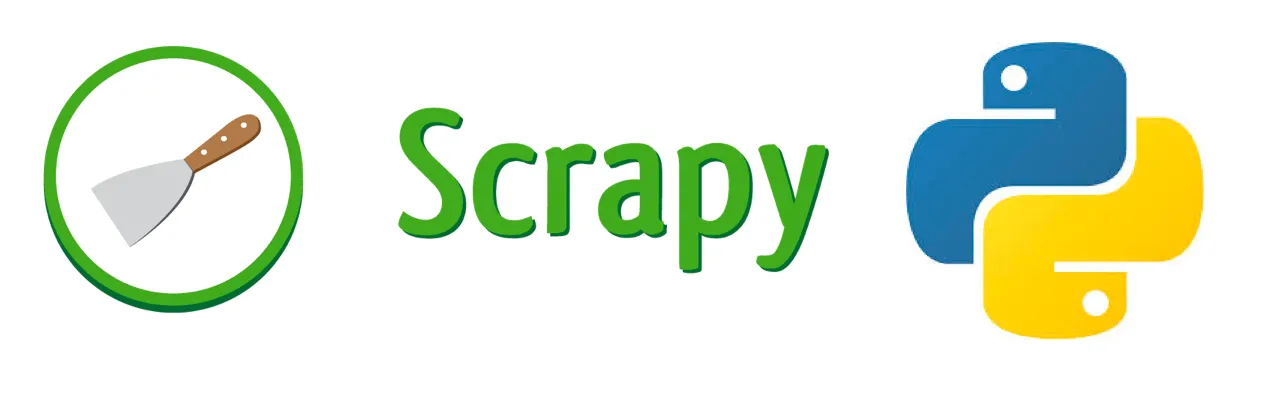


# Web Scraping with Scrapy and Python
This notebook demonstrates the process of web scraping using Scrapy, a popular Python framework for extracting data from websites. We focus on scraping data from 'Shopclues' in the mobiles featured store section.


In [10]:
# Install the Scrapy package necessary for web scraping
!pip install scrapy

# Shopclues Web Scraper
This script defines a Scrapy spider named `ShopcluesSpider` for scraping product data from Shopclues' 4G smartphone section. The scraped data includes product titles, prices, image URLs, and discounts.


In [12]:
# Generate a new Scrapy spider for the specified website
!scrapy genspider shopclues www.shopclues.com/mobiles-featured-store-4g-smartphone.html

Created spider 'shopclues' using template 'basic' 


In [13]:
# Import necessary libraries for web scraping
import requests
from scrapy import Selector



In [ ]:
# Define the URL of the webpage to scrape
url = 'https://www.shopclues.com/mobiles-featured-store-4g-smartphone.html'

# Fetch the HTML content of the webpage
html_content = requests.get(url).text
response = Selector(text=html_content)

# Extract data from the webpage
# Extracting Images
data_images = response.css("img::attr(data-img)").extract()

# Extracting Titles
titles = response.css("img::attr(title)").extract()

# Extracting Prices
prices = response.css(".p_price::text").extract()

# Extracting Discounts
discounts = response.css(".prd_discount::text").extract()


In [17]:
%%writefile shopclues_spider.py
import scrapy
from scrapy.crawler import CrawlerProcess

# Define the ShopcluesSpider class which inherits from scrapy.Spider
class ShopcluesSpider(scrapy.Spider):
    name = 'shopclues' # Name of the spider
    allowed_domains = ['shopclues.com'] # Restrict spider to this domain
    start_urls = ['https://www.shopclues.com/mobiles-featured-store-4g-smartphone.html'] # URL to start scraping from

    def parse(self, response):
        # Extracting product details from the page
        titles = response.css('img::attr(title)').extract() # Extract product titles
        images = response.css('img::attr(data-img)').extract() # Extract image URLs
        prices = response.css('.p_price::text').extract() # Extract product prices
        discounts = response.css('.prd_discount::text').extract() # Extract discount information

        # Zip all extracted details and yield as individual items
        for item in zip(titles, prices, images, discounts):
            scraped_info = {
                'title': item[0],
                'price': item[1],
                'image_urls': [item[2]],
                'discount': item[3]
            }

            yield scraped_info

# Setting up and starting the scraping process
process = CrawlerProcess(settings={
    'FEED_URI': 'shopclues.csv', # Output file
    'FEED_FORMAT': 'csv' # Output format
})

process.crawl(ShopcluesSpider) # Initiate crawl with ShopcluesSpider
process.start() # Start the scraping process


Writing shopclues_spider.py


## Execution and Output
The script initiates the scraping process using `CrawlerProcess` and crawls the `ShopcluesSpider`. The scraped data is stored in a CSV file named `shopclues.csv`. This output can be used for further data analysis or integration into other applications.


In [18]:
!python shopclues_spider.py

2023-11-13 17:29:21 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: scrapybot)
2023-11-13 17:29:21 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:57:19) [GCC 11.3.0], pyOpenSSL 23.2.0 (OpenSSL 3.1.1 30 May 2023), cryptography 41.0.1, Platform Linux-5.15.0-78-generic-x86_64-with-glibc2.35
2023-11-13 17:29:21 [scrapy.addons] INFO: Enabled addons:
[]
2023-11-13 17:29:21 [py.warnings] WARNING: /opt/conda/lib/python3.11/site-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the docum

## Post-Execution
After running the above command, the spider will scrape the data from Shopclues' website and save it in the `shopclues.csv` file. This file can then be used for data analysis, reporting, or any other desired purpose.


## Defining Scrapy Item for TechCrunch
This section involves defining a Scrapy `Item` class named `TechcrunchItem`. This class specifies the data structure for storing scraped data, including fields like title, link, and description, which we aim to extract from TechCrunch's feed.


In [19]:
import scrapy

# Define a Scrapy Item class for TechCrunch
class TechcrunchItem(scrapy.Item):
    title = scrapy.Field() # Field to store the title of the article
    link = scrapy.Field()  # Field to store the link of the article
    description = scrapy.Field() # Field to store the description of the article


## Creating TechCrunch Spider Script
Here we write a Python script `techcrunch_spider.py` defining a Scrapy spider for scraping articles from TechCrunch's feed. The spider, named `TechcrunchSpider`, will extract the title, link, and description of each post.


In [20]:
%%writefile techcrunch_spider.py
import scrapy
from scrapy.crawler import CrawlerProcess

# Define the Scrapy spider for TechCrunch
class TechcrunchSpider(scrapy.Spider):
    name = 'techcrunch' # Name of the spider
    allowed_domains = ['techcrunch.com'] # Domain to scrape
    start_urls = ['https://techcrunch.com/feed/'] # Starting URL

    def parse(self, response):
        # Parsing the response and yielding scraped data
        for post in response.xpath('//item'):
            yield {
                'title': post.xpath('title/text()').get(), # Extract title
                'link': post.xpath('link/text()').get(), # Extract link
                'description': post.xpath('description/text()').get() # Extract description
            }

Writing techcrunch_spider.py


In [21]:
!scrapy runspider techcrunch_spider.py -o techcrunch.csv

2023-11-13 17:37:04 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: scrapybot)
2023-11-13 17:37:04 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:57:19) [GCC 11.3.0], pyOpenSSL 23.2.0 (OpenSSL 3.1.1 30 May 2023), cryptography 41.0.1, Platform Linux-5.15.0-78-generic-x86_64-with-glibc2.35
2023-11-13 17:37:04 [scrapy.addons] INFO: Enabled addons:
[]
2023-11-13 17:37:04 [py.warnings] WARNING: /opt/conda/lib/python3.11/site-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the docum